<img src="Logo-for-use-in-white-background.png" style="width:300px;height:60pz"/>


# Autonomous Vehicle Design (9002)
### Instructor: G. Nikolaou (Γ. Νικολάου)
### Author: Η. Xhindi (Χ. Τζίντι)

<br>

# End-to-End Deep Learning for Autonomous Vehicles


## Importing the necessary libraries 📕

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import cv2

import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Importing and exploring the dataset 🗂️


In [2]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

# path based on the data from the unity app 
data = pd.read_csv('/home/henry/Downloads/Autonomous Vehicles/driving_log.csv',names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/henry/Downloads/Autonomous Vehicles/IMG/center_2022_02_23_20_11_56_799.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/left_2022_02_23_20_11_56_799.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/right_2022_02_23_20_11_56_799.jpg,0.00,0.0,0.0,26.77006
1,/home/henry/Downloads/Autonomous Vehicles/IMG/center_2022_02_23_20_11_56_880.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/left_2022_02_23_20_11_56_880.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/right_2022_02_23_20_11_56_880.jpg,0.00,0.0,0.0,26.55481
2,/home/henry/Downloads/Autonomous Vehicles/IMG/center_2022_02_23_20_11_56_964.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/left_2022_02_23_20_11_56_964.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/right_2022_02_23_20_11_56_964.jpg,0.00,0.0,0.0,26.28819
3,/home/henry/Downloads/Autonomous Vehicles/IMG/center_2022_02_23_20_11_57_044.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/left_2022_02_23_20_11_57_044.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/right_2022_02_23_20_11_57_044.jpg,-0.15,0.0,0.0,26.06813
4,/home/henry/Downloads/Autonomous Vehicles/IMG/center_2022_02_23_20_11_57_113.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/left_2022_02_23_20_11_57_113.jpg,/home/henry/Downloads/Autonomous Vehicles/IMG/right_2022_02_23_20_11_57_113.jpg,-0.30,0.0,0.0,25.86838


Basic info of our data

In [3]:
print(data.iloc[971])

center      /home/henry/Downloads/Autonomous Vehicles/IMG/center_2022_02_23_20_13_11_287.jpg
left          /home/henry/Downloads/Autonomous Vehicles/IMG/left_2022_02_23_20_13_11_287.jpg
right        /home/henry/Downloads/Autonomous Vehicles/IMG/right_2022_02_23_20_13_11_287.jpg
steering                                                                                0.05
throttle                                                                                 1.0
reverse                                                                                  0.0
speed                                                                               30.00098
Name: 971, dtype: object


In [4]:
data.shape

(3607, 7)

<AxesSubplot:>

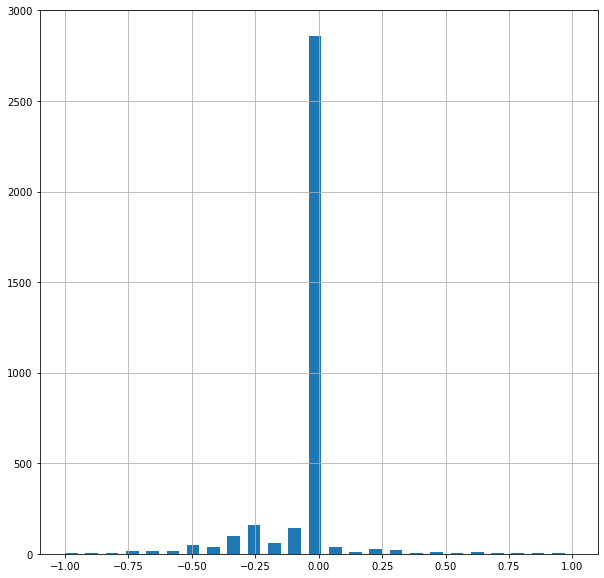

In [5]:
data['steering'].hist(bins=25,width=0.05, figsize=(10,10))

### Splitting the dataset into training and testing data 🤖

In [6]:
X=data['center']
y=data['steering']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True,random_state=19)

In [8]:
X_train.shape


(2705,)

In [9]:
X_test.shape

(902,)

In [10]:
a=1371
X_train[a]

'/home/henry/Downloads/Autonomous Vehicles/IMG/center_2022_02_23_20_13_41_867.jpg'

In [11]:
y_train[a]

0.0

<AxesSubplot:>

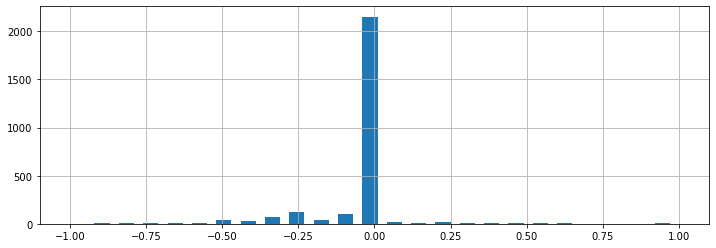

In [12]:
y_train.hist(bins=25,width=0.05, figsize=(12,4))

<AxesSubplot:>

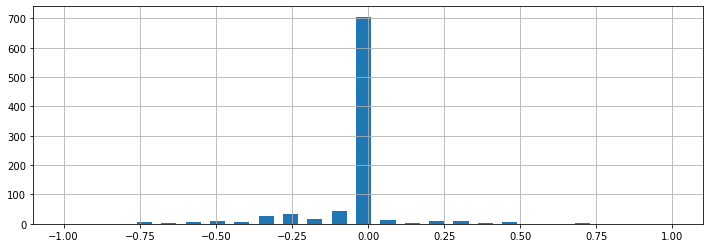

In [13]:
y_test.hist(bins=25,width=0.05, figsize=(12,4))

## Image preprocessing 🖼️

160 320 3


Text(0.5, 1.0, 'First Image')

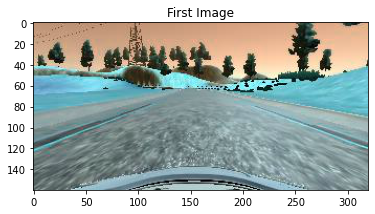

In [14]:
a=1000
image=X[a]
firsti=cv2.imread(image)
type(firsti)
height, width, channels = firsti.shape
print(height, width, channels)
plt.imshow(firsti)
plt.title('First Image')

The photos are edited-cut so that we have less information for our training (we look to crop pieces that will not affect the performance of our model, that is, in our case the road looks clear).

75 320 3


Text(0.5, 1.0, 'Cropped Image')

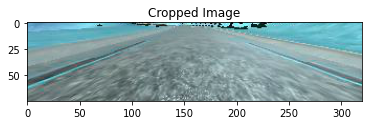

In [15]:
edited = firsti[60:135,:,:]

height, width, channels = edited.shape
print(height, width, channels)
plt.imshow(edited)
plt.title('Cropped Image')

We can also change the colorspace of our image.

Text(0.5, 1.0, 'Image with different colorspace')

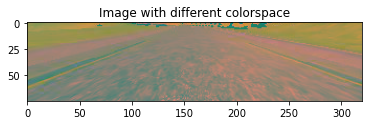

In [16]:
edited2=cv2.cvtColor(edited,cv2.COLOR_RGB2YUV)
plt.imshow(edited2)
plt.title('Image with different colorspace')

We can change the image's filter too.

Text(0.5, 1.0, 'Blured Image')

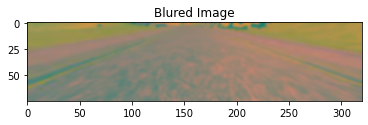

In [17]:
edited3=cv2.GaussianBlur(edited2,(5,5),0)
plt.imshow(edited3)
plt.title('Blured Image')

We can also change the dimensions of the image so that it is suitable for the nvidia model.

Text(0.5, 1.0, 'Image suitable for nvdia model')

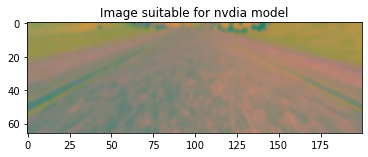

In [18]:
edited4=cv2.resize(edited3,(200,66))
plt.imshow(edited4)
plt.title('Image suitable for nvdia model')

### Create function with all image preprocessing steps

In [19]:
def pre_editied_image(image):
    image=cv2.imread(image)
    image=image[60:135,:,:]
    image=cv2.cvtColor(image,cv2.COLOR_RGB2YUV)
    image=cv2.GaussianBlur(image,(5,5),0)
    image=cv2.resize(image,(200,66))
    image=image/255
    return image

#### Apply image preprocessing function to data

In [20]:
X_train=np.array(list(map(pre_editied_image,X_train)))
X_test=np.array(list(map(pre_editied_image,X_test)))

(2705, 66, 200, 3)

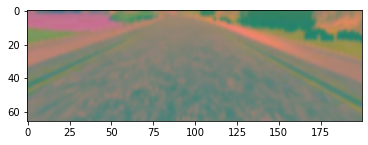

In [21]:
plt.imshow(X_train[8])
X_train.shape


# Training Regression model with Neural Networks

## Step 1 - Select Sequential model architecture

The type of model we will use is the sequential (**Sequential**).
<br>
Sequential is the easiest way to design a model in the Keras library.
<br>
<br>
It allows **creating the model in layers.**
<br>
<br>
A **Layer** is a simple **input-output transform**
<br>
<br>
We use the **add()** function to add layers to our model.
<br>
<br>

In [22]:
model = keras.Sequential()
     
model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
         
     
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dropout(0.4))
     
     
model.add(Dense(50, activation='elu'))
model.add(Dropout(0.4)) 

model.add(Dense(10, activation ='elu'))
model.add(Dense(1))

2022-07-05 17:22:25.309598: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-07-05 17:22:25.333791: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2096110000 Hz
2022-07-05 17:22:25.334605: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b6d7858ff0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-05 17:22:25.334646: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-07-05 17:22:25.334846: I tensorflow/core/common_runtime/process_util.cc:147] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Summary of model architecture and number of parameters**

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

## Step 2 - Training parameterization
Before the model is ready for training, it needs a few more settings. These are added during the **compile** step of the model:

**Loss function** - measures how accurate the model is during training and is used to find the "best" parameter values ​​for the model i.e. the weights in the neural network.
<br>
<br>
**Optimizer** - finds the optimal values ​​of the Neural Network weights based on the data it sees and minimizing the Loss Function.

In [24]:
model.compile(loss='mse', optimizer="adam")

## Step 3 - Model training

The model is trained using the **fit** method

In [25]:
history=model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=30,
          batch_size=128,
          verbose=1,
          shuffle=1)

Train on 2705 samples, validate on 902 samples
Epoch 1/30
2705/2705 [==============================] - 12s 4ms/step - loss: 0.1420 - val_loss: 0.0239
Epoch 2/30
2705/2705 [==============================] - 11s 4ms/step - loss: 0.0286 - val_loss: 0.0218
Epoch 3/30
2705/2705 [==============================] - 10s 4ms/step - loss: 0.0254 - val_loss: 0.0210
Epoch 4/30
2705/2705 [==============================] - 9s 3ms/step - loss: 0.0234 - val_loss: 0.0195
Epoch 5/30
2705/2705 [==============================] - 9s 3ms/step - loss: 0.0226 - val_loss: 0.0187
Epoch 6/30
2705/2705 [==============================] - 9s 3ms/step - loss: 0.0214 - val_loss: 0.0181
Epoch 7/30
2705/2705 [==============================] - 11s 4ms/step - loss: 0.0208 - val_loss: 0.0182
Epoch 8/30
2705/2705 [==============================] - 11s 4ms/step - loss: 0.0208 - val_loss: 0.0180
Epoch 9/30
2705/2705 [==============================] - 13s 5ms/step - loss: 0.0202 - val_loss: 0.0176
Epoch 10/30
2705/2705 [======

## Step 4 - Model Performance Evaluation

Text(0.5, 0, 'Epoch')

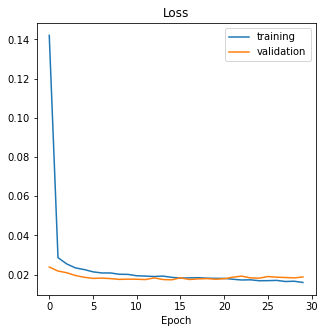

In [26]:
fig=plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

## Save trained model

In [27]:
model.save('model.h5')